In [23]:
import pandas as pd
import numpy as np
#
import warnings
warnings.filterwarnings("ignore")
#

In [24]:
path_to_file = "../data/Component_Faults_Data.csv"
df = pd.read_csv(path_to_file)

In [25]:
x = df.iloc[:, :48].values
y = df["class"].values.reshape(-1, 1)

In [26]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)

In [27]:

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [29]:
class HelperClass:

    # params for building model
    input_layer_dim = 48
    output_layer_dim = 11

    def build(self, number_of_hidden_layers, number_of_units_per_layer,
              activation_function='relu', loss_function='categorical_crossentropy', optimizer='sgd'):

        from keras.models import Sequential
        from keras.layers import Dense

        model = Sequential()
        # Input layer
        model.add(Dense(number_of_units_per_layer, input_dim=self.input_layer_dim, activation=activation_function))
        # Hidden layer
        for i in range(number_of_hidden_layers):
            model.add(Dense(number_of_units_per_layer, activation=activation_function))
        # Output layer
        model.add(Dense(self.output_layer_dim, activation='softmax'))

        model.compile(loss=loss_function, optimizer=optimizer, metrics=['accuracy'])

        return model

    @staticmethod
    def train(model, x_train, y_train, epochs, batch_size):
        history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)
        return model, history
    
    @staticmethod
    def test(model):
        y_pred = model.predict(x_test)
        # Converting predictions to label
        pred = list()
        for i in range(len(y_pred)):
            pred.append(np.argmax(y_pred[i]))
        # Converting one hot encoded test label to label
        test = list()
        for i in range(len(y_test)):
            test.append(np.argmax(y_test[i]))

        from sklearn.metrics import accuracy_score
        accuracy = accuracy_score(pred, test)
        return accuracy

In [32]:
hc = HelperClass()
res = {}

for j in range(1):
    model = hc.build(number_of_hidden_layers=2, number_of_units_per_layer=48)
    trained_model, history = hc.train(model, x_train, y_train, batch_size=64, epochs=100)
    accuracy = hc.test(trained_model)
    
    res.update({j: float(a)})

Epoch 1/100
26329/26329 [==============================] - 2s 76us/step - loss: 2.1076 - acc: 0.2747
Epoch 2/100
26329/26329 [==============================] - 1s 27us/step - loss: 1.5203 - acc: 0.4697
Epoch 3/100
26329/26329 [==============================] - 1s 25us/step - loss: 1.0084 - acc: 0.6393
Epoch 4/100
26329/26329 [==============================] - 1s 23us/step - loss: 0.7035 - acc: 0.7540
Epoch 5/100
26329/26329 [==============================] - 1s 23us/step - loss: 0.5156 - acc: 0.8289
Epoch 6/100
26329/26329 [==============================] - 1s 24us/step - loss: 0.3980 - acc: 0.8697
Epoch 7/100
26329/26329 [==============================] - 1s 27us/step - loss: 0.3264 - acc: 0.8946
Epoch 8/100
26329/26329 [==============================] - 1s 25us/step - loss: 0.2795 - acc: 0.9088
Epoch 9/100
26329/26329 [==============================] - 1s 26us/step - loss: 0.2462 - acc: 0.9182
Epoch 10/100
26329/26329 [==============================] - 1s 25us/step - loss: 0.2197 - a

26329/26329 [==============================] - 1s 25us/step - loss: 0.0295 - acc: 0.9920
Epoch 82/100
26329/26329 [==============================] - 1s 28us/step - loss: 0.0289 - acc: 0.9921
Epoch 83/100
26329/26329 [==============================] - 1s 24us/step - loss: 0.0281 - acc: 0.9930
Epoch 84/100
26329/26329 [==============================] - 1s 23us/step - loss: 0.0283 - acc: 0.9924
Epoch 85/100
26329/26329 [==============================] - 1s 25us/step - loss: 0.0274 - acc: 0.9929
Epoch 86/100
26329/26329 [==============================] - 1s 25us/step - loss: 0.0275 - acc: 0.9929
Epoch 87/100
26329/26329 [==============================] - 1s 24us/step - loss: 0.0269 - acc: 0.9934
Epoch 88/100
26329/26329 [==============================] - 1s 24us/step - loss: 0.0265 - acc: 0.9929
Epoch 89/100
26329/26329 [==============================] - 1s 24us/step - loss: 0.0262 - acc: 0.9934
Epoch 90/100
26329/26329 [==============================] - 1s 24us/step - loss: 0.0258 - acc: 

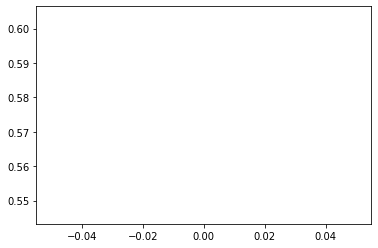

In [33]:
import matplotlib.pyplot as plt

plt.plot(list(res.keys()), list(res.values()))
plt.show()